# 1ère Partie : Discussion autour du travail en autonomie

* Tour de parole ressenti globale
* 1 à 2 présentation de solution par catégorie
* Approfondissement de certains aspects des solutions employées

# 2ème partie : Analyse et Clustering sur un Nouveau Jeu de Données Catégorielles

Vous travaillerez de manière plus autonome en utilisant un nouveau jeu de données, afin d'appliquer les concepts vus dans les TDs précédents.

Jeu de données au choix:

* House Prices - Advanced Regression Techniques:
  * https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data
  * nombreuses catégories (79)
  * Objectif: prédire le prix d'une maison
* Telco Customer Churn:
  * https://www.kaggle.com/datasets/blastchar/telco-customer-churn
  * moins de catégories (21)
  * sujet important pour entreprise de services au client
  * Objectif: prédire les clients les plus susceptibles de partir


## Partie 2.1 : Exploration des Données

### Chargement des Données

* Chargez un jeu de données de votre choix via pandas.
* Affichez un aperçu du dataset (avec df.head()) et vérifiez ses dimensions.

### Nettoyage des Données

* Vérifiez les valeurs manquantes et traitez-les de manière appropriée (remplacez-les ou supprimez-les si nécessaire).
* Vérifiez la distribution des colonnes importantes (par exemple, les variables cibles ou les variables explicatives clés).

### Statistiques Descriptives

* Utilisez des outils comme df.describe() pour afficher les statistiques descriptives des variables numériques.

* Identifiez des tendances initiales dans les données. Quelles variables semblent les plus importantes ?

### Visualisation

* Réalisez des visualisations de base (histogrammes, diagrammes en boîte, heatmap de corrélation) pour explorer les relations entre les variables.

Suggestions : Utilisez seaborn pour des visualisations comme les boxplots et heatmaps pour illustrer des relations.


In [10]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Chargement des données Titanic
url = 'house-prices-advanced-regression-techniques/train.csv'
df = pd.read_csv(url)
# lignes du dataset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
# Remplacer les valeurs manquantes
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['PoolQC'] = df['PoolQC'].fillna('None')
df['GarageCars'] = df['GarageCars'].fillna(0)

for col in df.columns:
    if df[col].isnull().any():
        if df[col].dtype == 'object':
            # Catégoriel
            if 'None' in df[col].unique():
                df[col] = df[col].fillna('None')
            else:
                df[col] = df[col].fillna(df[col].mode()[0])
        else:
            # Numérique
            df[col] = df[col].fillna(df[col].median())

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,None,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,None,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,0,12,2008,WD,Normal,250000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [15]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Les colonnes importantes
SalePrice : la variable cible (prix de vente).
OverallQual : qualité générale du matériau et de la finition.
GrLivArea : surface habitable au-dessus du sol.
TotalBsmtSF : surface totale du sous-sol.
GarageCars : nombre de voitures que le garage peut contenir.
GarageArea : surface du garage.
YearBuilt : année de construction.
FullBath : nombre de salles de bain complètes.
KitchenQual : qualité de la cuisine.
Neighborhood : quartier (impacte fortement le prix).
ExterQual : qualité extérieure.

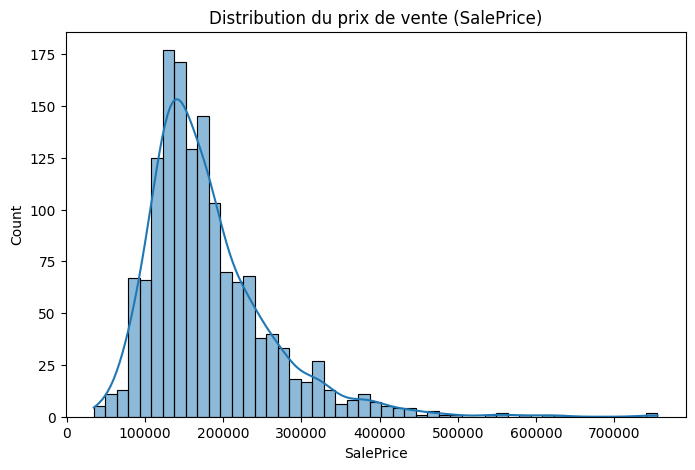

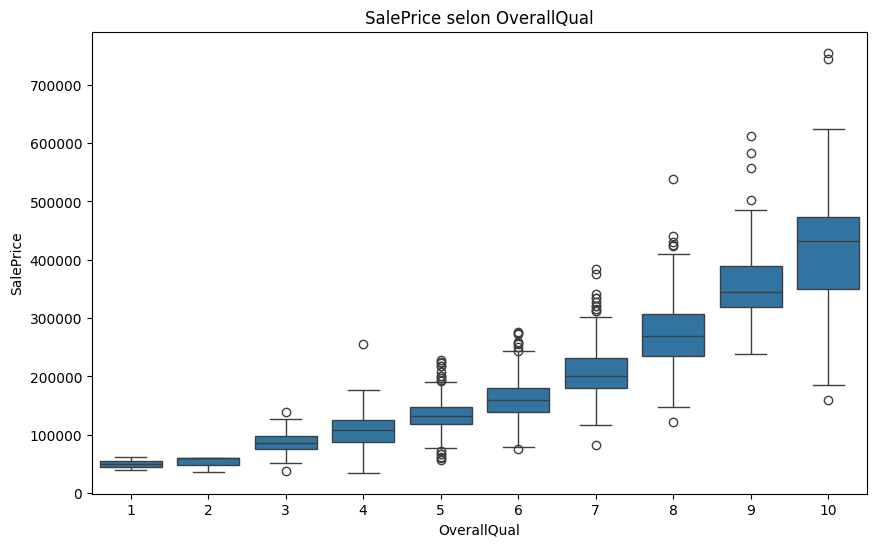

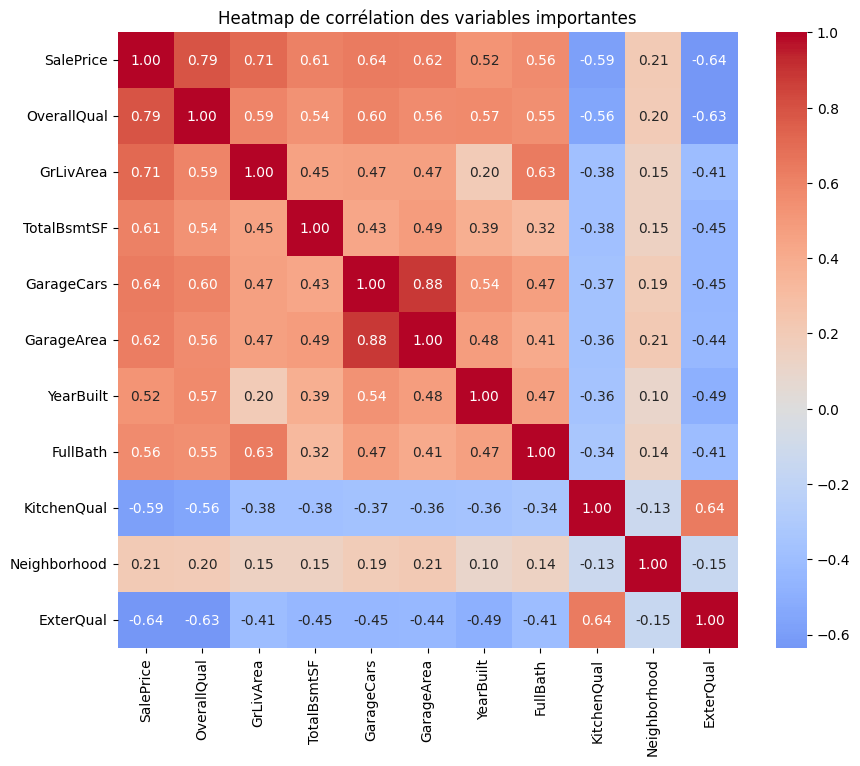

In [19]:
# Visualisation de la distribution de SalePrice
plt.figure(figsize=(8,5))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution du prix de vente (SalePrice)')
plt.xlabel('SalePrice')
plt.show()

# Boxplot des variables importantes
plt.figure(figsize=(10,6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('SalePrice selon OverallQual')
plt.show()

# Heatmap de corrélation des variables pertinentes
# Sélection des variables importantes
important_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'GarageArea', 'YearBuilt', 'FullBath']
# Encodage des variables catégorielles importantes
df_encoded = df.copy()
from sklearn.preprocessing import LabelEncoder
for col in ['KitchenQual', 'Neighborhood', 'ExterQual']:
    if col in df_encoded.columns:
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))
important_features += ['KitchenQual', 'Neighborhood', 'ExterQual']

plt.figure(figsize=(10,8))
corr = df_encoded[important_features].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Heatmap de corrélation des variables importantes')
plt.show()

## Partie 2.2 :  Représentation des Données

### Encodage des Variables Catégorielles

* Si votre jeu de données contient des variables catégorielles (comme dans le Titanic dataset), encodez-les en utilisant LabelEncoder ou OneHotEncoder.

### Transformation des Données

* Transformez les colonnes numériques à l'aide de techniques de normalisation ou de standardisation (StandardScaler, MinMaxScaler).

* Justifiez le choix de la transformation utilisée. Pourquoi est-il important de transformer certaines colonnes avant d'appliquer des algorithmes ?


In [23]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
# Encodage des variables catégorielles à partir du DataFrame nettoyé (df_cleaned)
df_encoded = df.copy()
categorical_cols = df_encoded.select_dtypes(include=['object']).columns

for col in categorical_cols:
    # Si peu de modalités, OneHotEncoder est souvent préférable
    if df_encoded[col].nunique() <= 3:
        # OneHotEncoder nécessite reshape, on utilise pandas get_dummies pour simplifier
        onehot_encoder = OneHotEncoder(sparse_output=False)
        dummies = onehot_encoder.fit_transform(df_encoded[col].values.reshape(-1, 1))
        dummies = pd.DataFrame(dummies, columns=onehot_encoder.get_feature_names_out([col]))
        df_encoded = pd.concat([df_encoded.drop(col, axis=1), dummies], axis=1)
    else:
        # LabelEncoder pour les colonnes à nombreuses modalités
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

df_encoded.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,MasVnrType_BrkFace,MasVnrType_Stone,CentralAir_N,CentralAir_Y,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,1,60,3,65.0,8450,3,3,4,5,2,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2,20,3,80.0,9600,3,3,2,24,1,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,3,60,3,68.0,11250,0,3,4,5,2,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,4,70,3,60.0,9550,0,3,0,6,2,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,5,60,3,84.0,14260,0,3,2,15,2,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


Pour les colones où il n'y a pas beaucoup de valeur, j'ai chosie d'utilise le OneHot car il crée une colonne par valeur unique. Pour le reste le StandardScaler.Les algorithmes de machine learning nécessitent des données numériques.

## Partie 2.3 : Réduction de Dimensionnalité

### Application de PCA

* Appliquez une réduction de dimensionnalité avec PCA et réduisez les données à 2 ou 3 dimensions.
* Visualisez les deux premières composantes principales à l’aide d’un scatterplot pour observer la structure des données réduites.
* Calculez la variance expliquée par les composantes principales.

### Application de t-SNE

* Appliquez t-SNE pour réduire les données à 2 dimensions et observez la structure des clusters formés.
* Comparez les résultats obtenus avec ceux de PCA.

### Comparaison entre PCA et t-SNE

* Comparez les projections obtenues par PCA et t-SNE. Quelle méthode semble mieux séparer les différentes classes ou groupes de données ? Le jeu de données semble-t-il facile à clusteriser ?

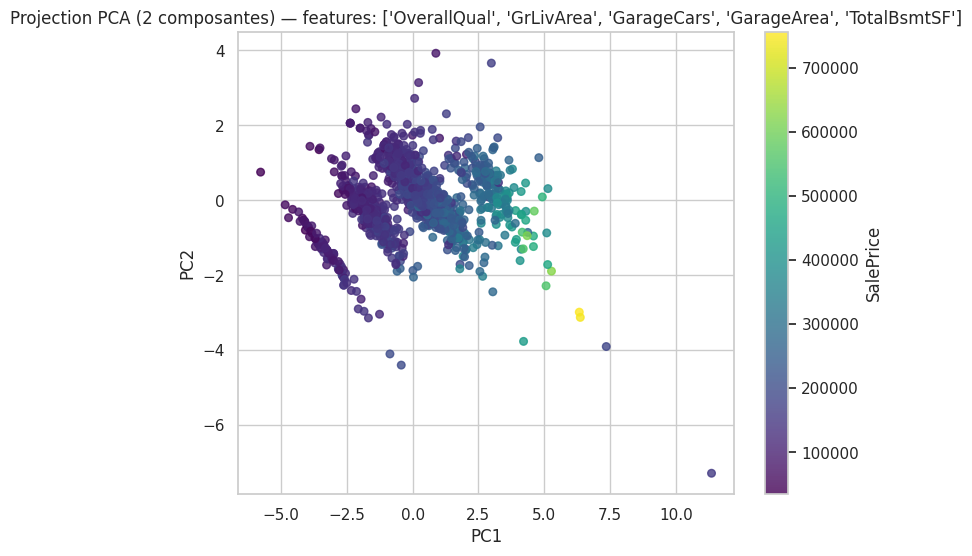

Variance expliquée (PC1, PC2): [np.float64(64.24), np.float64(14.91)]
Variance totale expliquée: 79.15 %


In [34]:
# Application de PCA sur une sélection de colonnes spécifiques
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sns.set_theme(style="whitegrid")

selected_features = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']
available = [f for f in selected_features if f in df_encoded.columns]
if len(available) == 0:
    raise ValueError(f'Aucune des colonnes sélectionnées nest présente dans df_encoded: {selected_features}')

# Préparer X à partir des colonnes choisies, forcer numérique et remplir NA
X_sub = df_encoded[available].copy()
X_sub = X_sub.apply(pd.to_numeric, errors='coerce').fillna(0)

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sub)

# PCA à 2 dimensions
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Visualisation des deux premières composantes principales (coloré par SalePrice si présent)
c = df_encoded['SalePrice'] if 'SalePrice' in df_encoded.columns else None
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=c, cmap='viridis', alpha=0.8, s=30)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection PCA (2 composantes) — features: ' + str(available))
if c is not None:
    plt.colorbar(label='SalePrice')
plt.show()

# Variance expliquée par les deux premières composantes
print('Variance expliquée (PC1, PC2):', [round(v*100,2) for v in pca.explained_variance_ratio_])
print('Variance totale expliquée:', round(sum(pca.explained_variance_ratio_)*100,2), '%')

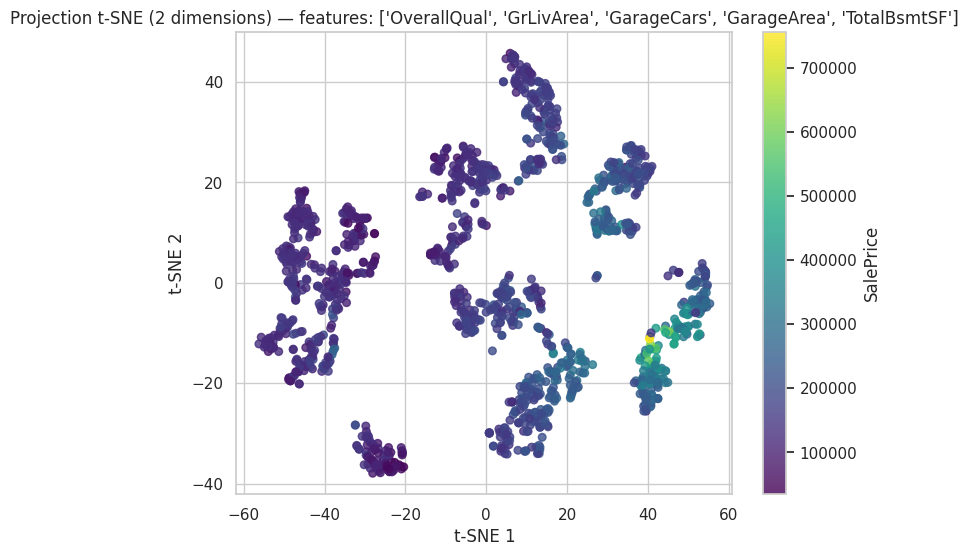

In [35]:
# Application de t-SNE sur la sélection de colonnes choisies
from sklearn.manifold import TSNE

selected_features = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']
available = [f for f in selected_features if f in df_encoded.columns]
if len(available) == 0:
    raise ValueError(f'Aucune des colonnes sélectionnées nest présente dans df_encoded: {selected_features}')

X_sub = df_encoded[available].copy()
X_sub = X_sub.apply(pd.to_numeric, errors='coerce').fillna(0)

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sub)

# t-SNE à 2 dimensions (peut être lent selon la taille du dataset)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

# Visualisation des deux dimensions t-SNE (coloré par SalePrice si présent)
c = df_encoded['SalePrice'] if 'SalePrice' in df_encoded.columns else None
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=c, cmap='viridis', alpha=0.8, s=30)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Projection t-SNE (2 dimensions) — features: ' + str(available))
if c is not None:
    plt.colorbar(label='SalePrice')
plt.show()

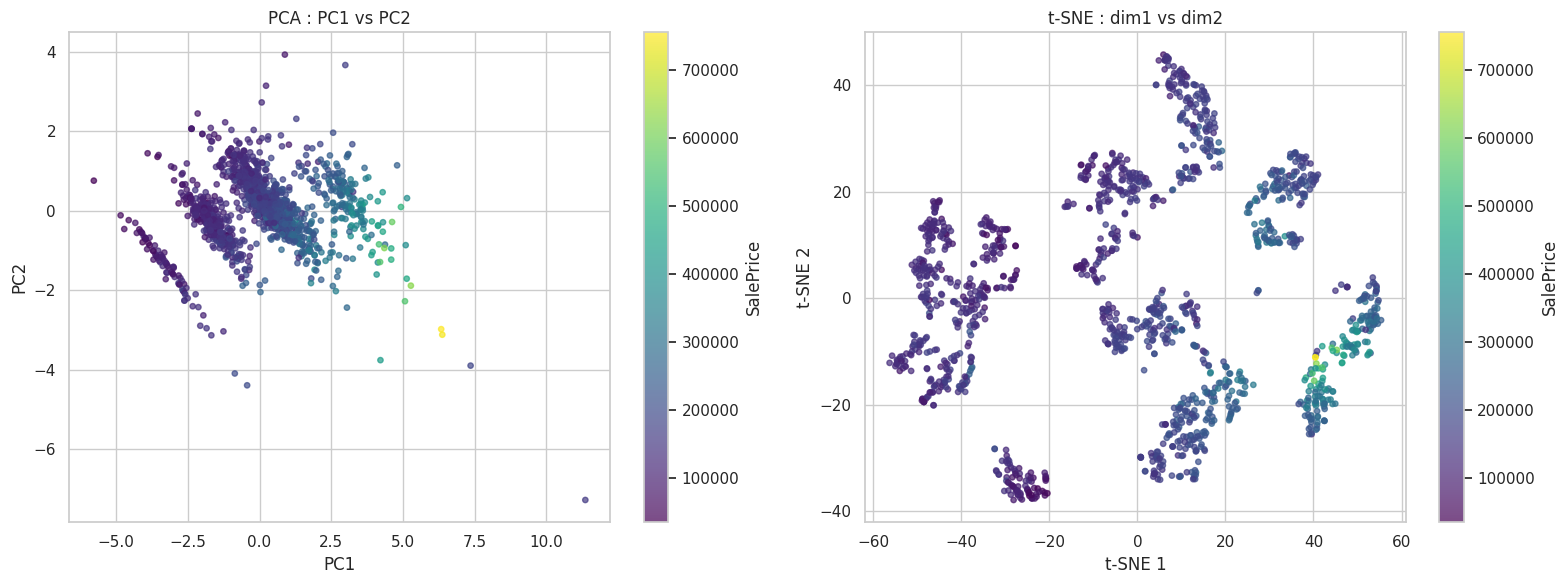

Variance expliquée (PC1, PC2): [np.float64(64.24), np.float64(14.91)]


In [36]:
# Comparaison côte à côte : PCA vs t-SNE
import matplotlib.pyplot as plt

c = df_encoded['SalePrice'] if 'SalePrice' in df_encoded.columns else None
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# PCA plot (assumes X_pca exists)
if 'X_pca' in globals():
    sc1 = axes[0].scatter(X_pca[:,0], X_pca[:,1], c=c, cmap='viridis', alpha=0.7, s=15)
    axes[0].set_title('PCA : PC1 vs PC2')
    axes[0].set_xlabel('PC1')
    axes[0].set_ylabel('PC2')
    if c is not None:
        fig.colorbar(sc1, ax=axes[0], label='SalePrice')
else:
    axes[0].text(0.5,0.5,'X_pca not found\nRun PCA cell first', ha='center')

# t-SNE plot (assumes X_tsne exists)
if 'X_tsne' in globals():
    sc2 = axes[1].scatter(X_tsne[:,0], X_tsne[:,1], c=c, cmap='viridis', alpha=0.7, s=15)
    axes[1].set_title('t-SNE : dim1 vs dim2')
    axes[1].set_xlabel('t-SNE 1')
    axes[1].set_ylabel('t-SNE 2')
    if c is not None:
        fig.colorbar(sc2, ax=axes[1], label='SalePrice')
else:
    axes[1].text(0.5,0.5,'X_tsne not found\nRun t-SNE cell first', ha='center')

plt.tight_layout()
plt.show()

# Petit résumé numérique utile
if 'pca' in globals():
    print('Variance expliquée (PC1, PC2):', [round(v*100,2) for v in pca.explained_variance_ratio_])
else:
    print('pca object not found - run PCA cell to get explained variance')

## Partie 2.4 : Clustering

### K-Means Clustering

* Appliquez l’algorithme K-Means pour réaliser un clustering des données en 2 ou 3 groupes (ou selon le nombre pertinent pour votre dataset).
* Visualisez les clusters obtenus après avoir réduit les dimensions avec PCA.

### Clustering Hiérarchique

* Appliquez l’algorithme de clustering hiérarchique sur les mêmes données.
Visualisez les clusters en utilisant un dendrogramme, et analysez la structure hiérarchique des groupes formés.

### Clustering au choix
* Appliquez un troisième algorithme de clustering (au choix) sur les mêmes données.
Visualiser-le d'une manière qui vous semble pertinente

### Comparaison des Méthodes de Clustering

* Comparez les résultats des trois méthodes en utilisant une métrique de similarité comme le score de Rand ou le coefficient de silhouette (ou autre).
* Analysez dans quelle mesure les clusters se recoupent avec les labels ou catégories connues .
* Prenez le temps d’analyser la pertinence des clusters obtenus. Dans quels cas les clusters sont-ils significatifs ? Y a-t-il beaucoup d'outliers ?

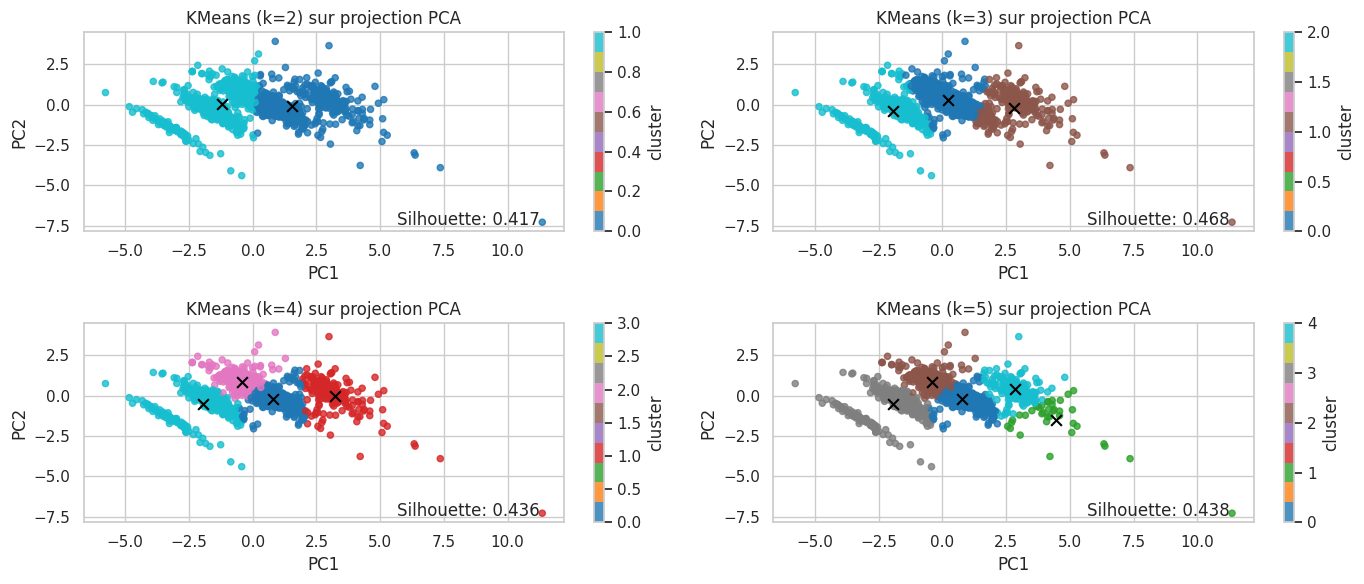

Moyenne SalePrice par cluster (k=5):
cluster3
0    205334.622363
1    421758.135135
2    145650.693593
3    122245.589744
4    288691.472050
Name: SalePrice, dtype: float64


In [45]:
# K-Means clustering sur la projection PCA (k=2 et k=3)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Si X_pca n'existe pas dans l'environnement, on la calcule à partir de df_encoded (comme dans la cellule PCA)
if 'X_pca' not in globals():
    X = df_encoded.drop('SalePrice', axis=1) if 'SalePrice' in df_encoded.columns else df_encoded.copy()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X_scaled)

# Exécuter KMeans pour k=2 et k=3 et afficher les clusters sur la projection PCA
fig, axes = plt.subplots(2, 2, figsize=(14,6))
axes_flat = axes.flatten()
for ax, k in zip(axes_flat, [2, 3, 4, 5]):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_pca)
    sc = ax.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='tab10', s=20, alpha=0.8)
    centers = km.cluster_centers_
    # centroids in PCA space
    ax.scatter(centers[:,0], centers[:,1], c='black', s=60, marker='x')
    ax.set_title(f'KMeans (k={k}) sur projection PCA')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    fig.colorbar(sc, ax=ax, label='cluster')
    # silhouette score (utile pour comparer k)
    try:
        sil = silhouette_score(X_pca, labels)
        ax.text(0.95, 0.01, f'Silhouette: {sil:.3f}', transform=ax.transAxes, ha='right', va='bottom')
    except Exception:
        pass

plt.tight_layout()
plt.show()

# Si SalePrice est présent, afficher la moyenne par cluster pour k=3 (diagnostic)
if 'SalePrice' in df_encoded.columns:
    km3 = KMeans(n_clusters=5, random_state=42).fit(X_pca)
    labels3 = km3.labels_
    df_clusters = pd.DataFrame(X_pca, columns=['PC1','PC2'])
    df_clusters['cluster3'] = labels3
    df_clusters['SalePrice'] = df_encoded['SalePrice'].values
    print('Moyenne SalePrice par cluster (k=5):')
    print(df_clusters.groupby('cluster3')['SalePrice'].mean())
else:
    print('SalePrice non présent dans df_encoded — pas de résumé par cluster')

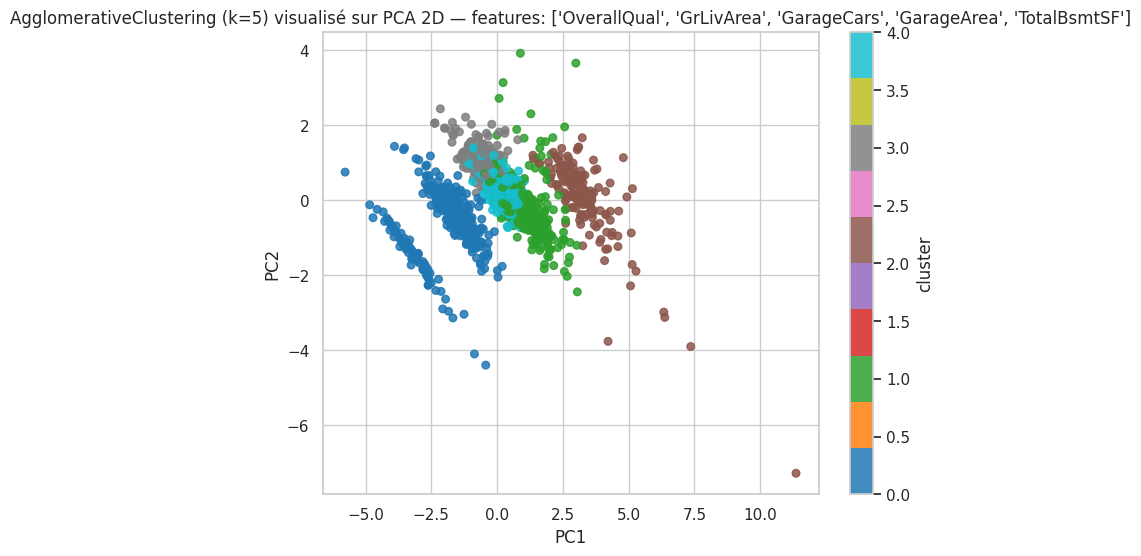

Taille des clusters :
0    444
1    389
2    168
3    168
4    291
Name: count, dtype: int64


In [52]:
# Clustering hiérarchique avec AgglomerativeClustering (sklearn) + dendrogramme pour visualisation
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

selected_features = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']
available = [f for f in selected_features if f in df_encoded.columns]
if len(available) == 0:
    raise ValueError(f'Aucune des colonnes sélectionnées nest présente dans df_encoded: {selected_features}')

# Préparer données et standardiser
X_sub = df_encoded[available].copy()
X_sub = X_sub.apply(pd.to_numeric, errors='coerce').fillna(0)
X_scaled = StandardScaler().fit_transform(X_sub)

# Affectation des clusters avec AgglomerativeClustering (sklearn)
k = 5
agg = AgglomerativeClustering(n_clusters=k, linkage='ward')
labels = agg.fit_predict(X_scaled)

# Projection PCA pour visualiser les clusters obtenus
pca_local = PCA(n_components=2, random_state=42)
X_pca_local = pca_local.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
plt.scatter(X_pca_local[:,0], X_pca_local[:,1], c=labels, cmap='tab10', s=30, alpha=0.85)
plt.title(f'AgglomerativeClustering (k={k}) visualisé sur PCA 2D — features: ' + str(available))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='cluster')
plt.show()

# Statistiques des clusters
import pandas as _pd
cluster_counts = _pd.Series(labels).value_counts().sort_index()
print('Taille des clusters :')
print(cluster_counts)

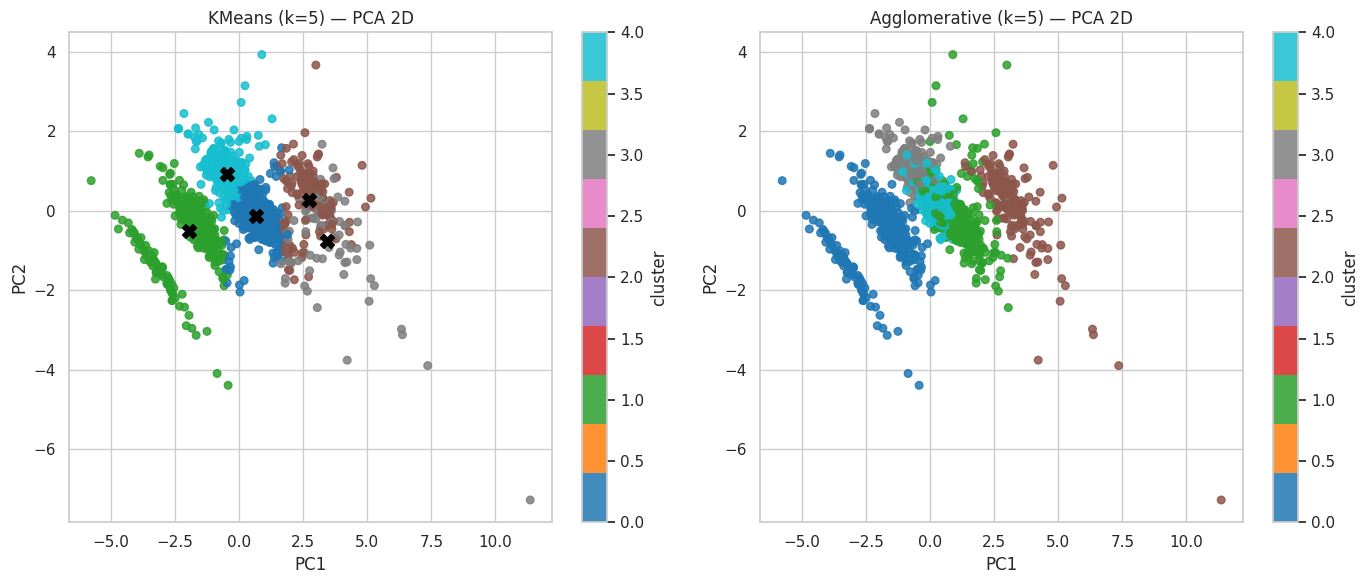

In [53]:
# Comparaison KMeans vs AgglomerativeClustering (k=5) sur les features sélectionnées
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
import pandas as _pd

selected_features = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']
available = [f for f in selected_features if f in df_encoded.columns]
if len(available) == 0:
    raise ValueError(f'Aucune des colonnes sélectionnées nest présente dans df_encoded: {selected_features}')

# Préparer données numériques et standardiser (mêmes steps que précédemment)
X_sub = df_encoded[available].copy()
X_sub = X_sub.apply(pd.to_numeric, errors='coerce').fillna(0)
X_scaled = StandardScaler().fit_transform(X_sub)

k = 5
# KMeans
km = KMeans(n_clusters=k, random_state=42)
labels_km = km.fit_predict(X_scaled)
# Agglomerative (sklearn)
agg = AgglomerativeClustering(n_clusters=k, linkage='ward')
labels_agg = agg.fit_predict(X_scaled)

# PCA pour visualisation côte à côte
pca_cmp = PCA(n_components=2, random_state=42)
X_pca_cmp = pca_cmp.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(14,6))
sc1 = axes[0].scatter(X_pca_cmp[:,0], X_pca_cmp[:,1], c=labels_km, cmap='tab10', s=30, alpha=0.85)
axes[0].set_title(f'KMeans (k={k}) — PCA 2D')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
# afficher centroïdes KMeans projetés en PCA space
centers_pca = pca_cmp.transform(km.cluster_centers_)
axes[0].scatter(centers_pca[:,0], centers_pca[:,1], c='black', s=100, marker='X')
fig.colorbar(sc1, ax=axes[0], label='cluster')

sc2 = axes[1].scatter(X_pca_cmp[:,0], X_pca_cmp[:,1], c=labels_agg, cmap='tab10', s=30, alpha=0.85)
axes[1].set_title(f'Agglomerative (k={k}) — PCA 2D')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
fig.colorbar(sc2, ax=axes[1], label='cluster')

plt.tight_layout()
plt.show()

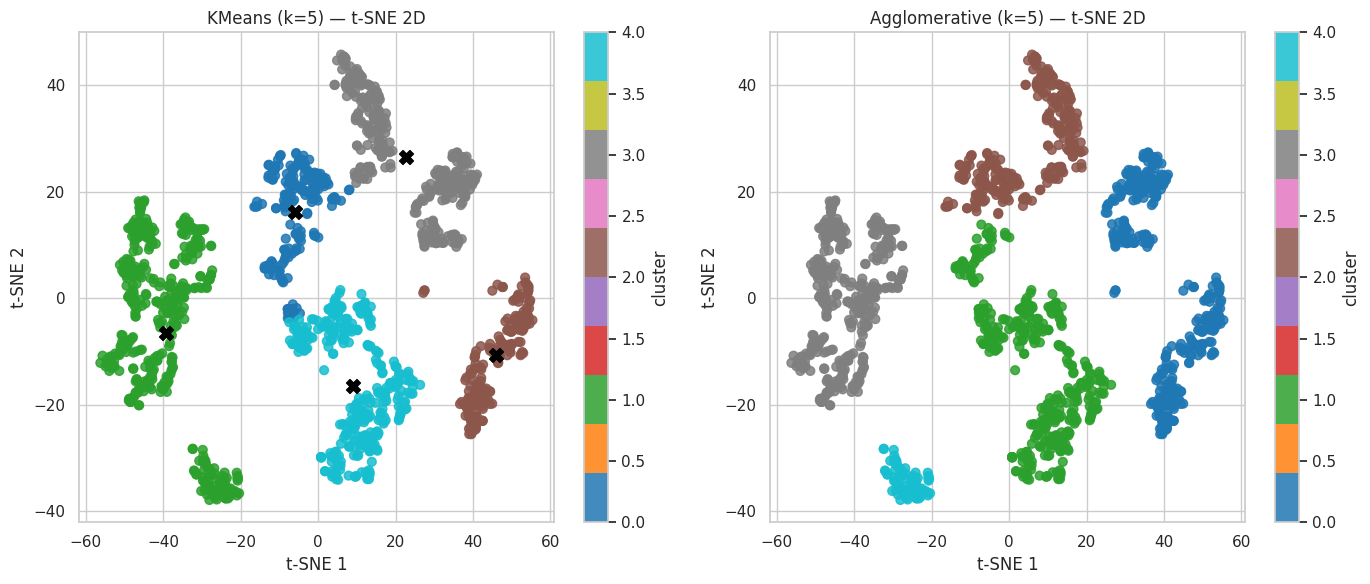

Silhouette KMeans (k=5): 0.47988924384117126
Silhouette Agglomerative (k=5): 0.5043638348579407
Adjusted Rand Index (KMeans vs Agglomerative): 0.6505695165639261

Taille clusters KMeans:
labels_km
0    192
1    444
2    185
3    304
4    335
Name: count, dtype: int64

Moyenne SalePrice par cluster (KMeans):
labels_km
0    132218.281250
1    123549.004505
2    311246.037838
3    194871.796053
4    200243.985075
Name: SalePrice, dtype: float64

Taille clusters Agglomerative:
labels_agg
0    336
1    400
2    280
3    363
4     81
Name: count, dtype: int64

Moyenne SalePrice par cluster (Agglomerative):
labels_agg
0    271470.511905
1    188542.170000
2    152350.814286
3    128063.520661
4    103317.283951
Name: SalePrice, dtype: float64


In [57]:
# Clustering sur t-SNE : KMeans vs Agglomerative (k=5)
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler
import pandas as _pd

selected_features = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']
available = [f for f in selected_features if f in df_encoded.columns]
if len(available) == 0:
    raise ValueError(f'Aucune des colonnes sélectionnées n\'est présente dans df_encoded: {selected_features}')

# Préparer données numériques et standardiser
X_sub = df_encoded[available].copy()
X_sub = X_sub.apply(pd.to_numeric, errors='coerce').fillna(0)
X_scaled = StandardScaler().fit_transform(X_sub)

# t-SNE sur les features standardisées (2D)
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

# KMeans et Agglomerative sur les coordonnées t-SNE (k=5)
k = 5
km = KMeans(n_clusters=k, random_state=42)
labels_km = km.fit_predict(X_tsne)
agg = AgglomerativeClustering(n_clusters=k, linkage='ward')
labels_agg = agg.fit_predict(X_tsne)

# Visualisation côte à côte
fig, axes = plt.subplots(1, 2, figsize=(14,6))
sc1 = axes[0].scatter(X_tsne[:,0], X_tsne[:,1], c=labels_km, cmap='tab10', s=40, alpha=0.85)
axes[0].set_title(f'KMeans (k={k}) — t-SNE 2D')
axes[0].set_xlabel('t-SNE 1')
axes[0].set_ylabel('t-SNE 2')
centers_tsne = km.cluster_centers_
axes[0].scatter(centers_tsne[:,0], centers_tsne[:,1], c='black', s=100, marker='X')
fig.colorbar(sc1, ax=axes[0], label='cluster')

sc2 = axes[1].scatter(X_tsne[:,0], X_tsne[:,1], c=labels_agg, cmap='tab10', s=40, alpha=0.85)
axes[1].set_title(f'Agglomerative (k={k}) — t-SNE 2D')
axes[1].set_xlabel('t-SNE 1')
axes[1].set_ylabel('t-SNE 2')
fig.colorbar(sc2, ax=axes[1], label='cluster')

plt.tight_layout()
plt.show()

# Métriques et statistiques
try:
    sil_km = silhouette_score(X_tsne, labels_km)
except Exception as e:
    sil_km = None
    print('Silhouette KM error:', e)
try:
    sil_agg = silhouette_score(X_tsne, labels_agg)
except Exception as e:
    sil_agg = None
    print('Silhouette Agg error:', e)

ari = adjusted_rand_score(labels_km, labels_agg)
print(f'Silhouette KMeans (k={k}):', sil_km)
print(f'Silhouette Agglomerative (k={k}):', sil_agg)
print('Adjusted Rand Index (KMeans vs Agglomerative):', ari)

# Taille et moyenne SalePrice par cluster (si SalePrice présent)
if 'SalePrice' in df_encoded.columns:
    df_tmp = _pd.DataFrame({'labels_km': labels_km, 'labels_agg': labels_agg, 'SalePrice': df_encoded['SalePrice'].values})
    print('\nTaille clusters KMeans:')
    print(df_tmp['labels_km'].value_counts().sort_index())
    print('\nMoyenne SalePrice par cluster (KMeans):')
    print(df_tmp.groupby('labels_km')['SalePrice'].mean())
    print('\nTaille clusters Agglomerative:')
    print(df_tmp['labels_agg'].value_counts().sort_index())
    print('\nMoyenne SalePrice par cluster (Agglomerative):')
    print(df_tmp.groupby('labels_agg')['SalePrice'].mean())
else:
    print('SalePrice non présent — pas de résumé par cluster')

# Sauvegarde des labels dans df_encoded
df_encoded['kmeans_tsne_k5'] = labels_km
df_encoded['agglo_tsne_k5'] = labels_agg

# Pour aller plus loin : jeu de données audio

A des fins d'approfondissement et/ou pour les plus rapides d'entre vous je vous propose d'effectuer un travail similaire mais sur un jeu de données audio.

Jeu de donnée UrbanSound8K:
* Il peut être judicieux de réduire le nombre d'instances sur lesquels vous travaillez (de 8K à 1K par exemple) afin de réduire les temps d'éxécution
* Il peut être judicieux de regarder la librairie **librosa** afin de travailler sur des fichiers audios
* Pour cette partie plus compliquée, n'hésitez pas à vous inspirez d'autres sources d'informations (notamment pour comprendre la structure du jeu de données, l'accès à des données exploitables est moins direct que sur les jeux précédents).

## Partie 3.1 : Exploration

### Information du dataset
* Regarder le readme.txt associé au jeu de données

### Chargement des Données Audio

* Chargez un jeu de données audio tel que UrbanSound8K.
* Affichez les métadonnées associées aux fichiers audio (par exemple, le nom du fichier, la durée, l'étiquette de la classe sonore).

### Exploration des Caractéristiques Audio

* Affichez la durée moyenne des fichiers audio et visualisez la distribution des étiquettes (types de sons).
* Explorez la diversité des classes (par exemple, bruit de fond, voix, instruments).

### Test audio
* Ecoutez un ou plusieurs extraits audio. Avec votre casque ou des écouteurs. Ou sinon une fois. S'il-vous-plaît. Soyez sage.





## Partie 3.2 : Représentation

### Extraction des Features Audio


* Prenant un exemple audio par classe, afficher le spectrogramme correspondant

* Extrayez les caractéristiques audio principales :
  * MFCCs
  * Chroma Features (signature de tonalité).
  * Zero-Crossing Rate

Suggestions : Vous pouvez utiliser librosa.feature.mfcc pour extraire les coefficients MFCC, et librosa.display.specshow pour afficher le spectrogramme.

## Partie 3.3 : Réduction de Dimensionnalité

### Application de PCA

* Appliquez PCA pour réduire la dimensionnalité des caractéristiques audio **extraites** à 2 ou 3 dimensions.
* Visualisez les deux premières composantes principales pour observer la distribution des échantillons audio.
* Calculez la variance expliquée par ces composantes.

### Application de t-SNE

* Appliquez t-SNE pour réduire les caractéristiques audio à 2 dimensions et observer la répartition des échantillons audio selon leurs classes.

### Comparaison PCA vs t-SNE

* Discutez des avantages et inconvénients des deux méthodes pour la représentation des données audio. Laquelle semble mieux séparer les classes sonores ?

Suggestions :
* Assurez-vous d’expérimenter avec des paramètres comme le nombre de composantes dans PCA ou le perplexity dans t-SNE pour voir l'impact sur la projection.
* Soyez vigilants sur les inputs et outputs de vos fonctions.

## Partie 3.4 : Clustering

### K-Means Clustering
* Appliquez K-Means pour réaliser deux clustering des données audio. Un à partir des **features extraites** réduites par PCA et l'autre par celles réduites par t-SNE. Fixer k = nombre de classe de bruits).

* Visualisez les 2 clusters obtenus.

* Par classe de bruit, quel taux de superposition ?

* Pouvez-vous trouvez un moyen d'afficher cette données visuellement sur les répresentation des clusters précédentes ?

* Quel est la meilleure technique de réduction à partir de ce résultat ?


## Bonus:

* Tester d'autres méthodes de réduction (comme UMAP).
* Tester d'autres caractérstiques audios (RMS, spectral centroid, spectral bandwidth)